# Trabalho Interdisciplinar - Análise de Dados

## Explicação do Modelo

Através da nossa análise, utilizando quatro modelos diferentes: <strong> GaussianNB, Gini, Entropia e KNN </strong>, chegamos à conclusão de qual modelo é o mais adequado para nossa base de dados, visando a aplicação em nosso aplicativo. Avaliamos as seguintes métricas:

- Acurácia: A taxa de acerto do modelo, indicando a porcentagem de previsões corretas.
- Precision: Mede a qualidade das previsões positivas do modelo, verificando quantas das previsões positivas estão corretas para uma determinada classe.
- Recall: Mede a capacidade do modelo de identificar todas as instâncias positivas reais, ou seja, quantos dos verdadeiros positivos foram corretamente identificados.
- F1-Score: Encontra um equilíbrio entre Precision e Recall, sendo ideal quando há necessidade de balancear as duas métricas. Um F1-Score próximo de 1 indica um bom equilíbrio entre Precision e Recall, enquanto um F1-Score próximo de 0 indica desempenho insatisfatório.

Focamos em duas métricas principais: Acurácia e F1-Score. Utilizamos a acurácia para avaliar a taxa geral de acerto do modelo e o F1-Score para verificar se Precision e Recall estão bem equilibrados entre as classes.

A partir de agora, passaremos à normalização da nossa base de dados, preparando-a adequadamente para o modelo final que será escolhido.

## Base de Dados

### <h3> Explicação da Base de Dados:
Nossa base de dados foi criada a partir de um formulário (FORMS) e contém um total de 11 colunas, sendo 10 delas atributos e uma resposta. Abaixo está a descrição de cada uma das colunas:

<hr>

#### <h4><strong> Atributos </strong>

<strong> 1. Faixa etária: </strong> Qual é a sua faixa etária? <br>

<strong> 2. Renda familiar mensal: </strong>Qual é a sua renda familiar mensal, considerando as seguintes faixas: <br>

<strong> 3. Práticas sustentáveis: </strong>Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia? <br>

<strong> 4. Frequência das práticas sustentáveis: </strong> Com que frequência você pratica uma ação sustentável? <br>

<strong> 5. Aprendizado sobre sustentabilidade na escola: </strong> Você aprendeu ou teve aulas sobre sustentabilidade na escola? <br>

<strong> 6. Uso de jogos no aprendizado escolar: </strong> Se você aprendeu sustentabilidade na escola, incluíram jogos para a sua aprendizagem? <br>

<strong> 7. Opinião sobre jogos para aprendizado: </strong> Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade? <br>

<strong> 8. Consumo de outros aplicativos/plataformas: </strong> Você faz ou já fez o consumo de outros aplicativos/plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa)? <br>

<strong> 9. Importância do conhecimento em Sustentabilidade/ESG: </strong> Você acha que o conhecimento sobre Sustentabilidade/ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional? <br>

<strong> 10. Funcionalidades úteis em um aplicativo: </strong> Quais das seguintes funcionalidades você consideraria mais útil em um aplicativo de aprendizado sobre Sustentabilidade e ESG (Governança ambiental, social e corporativa) com gamificação? <br>

<hr>

#### <h4><strong> Resposta </strong>

<strong> 11. Motivação da Pessoa: </strong> Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)

<hr>

### <h3> Explicação do nosso Tratamento da base

Para que a base de dados seja adequada à nossa análise, precisamos tratar os seguintes pontos:
- Nossa base de dados conterá valores nulos devido a perguntas condicionais no formulário, onde algumas pessoas podem não responder. Portanto, preencheremos esses valores nulos com 'Não' ou '0'.

- Uma das perguntas do nosso formulário é de múltipla escolha, o que significa que algumas linhas específicas da base podem ter mais de um valor. Para resolver isso, vamos dividir essa coluna em várias a partir da vírgula, de acordo com o número de respostas. Além disso, os valores nulos resultantes serão substituídos por 'Não' ou '0'.

- Em alguns casos, formulários como Google Forms ou similares adicionam colunas padrão que não são relevantes para a nossa análise. Essas colunas podem conter valores nulos ou dados que não agregam valor, podendo até comprometer a qualidade da análise. Portanto, é essencial identificar e excluir essas colunas para garantir que o conjunto de dados seja mais limpo e focado nas informações que realmente importam. Removendo essas colunas desnecessárias, podemos evitar ruídos e possíveis erros na análise, além de simplificar o processamento dos dados.

- Renomear o nomes das colunas do nosso dataset, por conta que as perguntas estão muito grandes.

- Nosso objetivo é avaliar as pessoas classificadas como 'Estudantil'. Para isso, transformaremos as outras classes ('Pessoal', 'Em um ambiente Profissional', e 'Não tenho motivação') em uma única categoria chamada 'Não tenho motivação'

<hr>

### Importações necessárias para nossa Análise

In [201]:
# Importações para análise de dados
import pandas as pd
import numpy as np

# Imporatações para o PCA - Reduzir a dimensionalidade das colunas
from sklearn.decomposition import PCA

# Importações para o Pré-processamento
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

# Importação para separar o treino e teste
from sklearn.model_selection import train_test_split

# Importação para aumentar nossa base de dados, duplicamento de dados
from imblearn.over_sampling import SMOTE

# Importações dos Modelos
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Importações para as Métricas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Importações para o Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Importações para plotarmos
import matplotlib.pyplot as plt
import seaborn as sns

# Importações para a Serialização
import joblib
import pickle as pkl

# Importação para o Pipeline
from imblearn.pipeline import Pipeline

### Importando nossa base de dados

In [202]:
df = pd.read_excel("EducaEco 🪴(1-252).xlsx")
display(df.head(3))

,ID,Hora de início,Hora de conclusão,Email,Nome,Qual sua faixa etária ?,"Qual é a sua renda familiar mensal, considerando as seguintes faixas:","Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?",Com que frequência você pratica uma ação sustentável ?,Você aprendeu ou teve aulas sobre sustentabilidade na escola?,"Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?",Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n,"Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?","Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?","Quais das seguintes funcionalidades você consideraria mais útil em um aplicativo de aprendizado sobre Sustentabilidade e ESG (Governança ambiental, social e corporativa) com gamificação.\n","Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)"
0,1,2024-08-29 11:51:57,2024-08-29 11:53:14,anonymous,NaN,Menos de 18 anos,"Classe C: Entre R$ 2.641,00 e R$ 7.920,00.",Não,NaN,Sim,Não,Talvez,Não,Sim,Vídeos com profissionais falando sobre Sustent...,Não tenho motivação
1,2,2024-08-29 11:52:35,2024-08-29 11:54:31,anonymous,NaN,Menos de 18 anos,"Classe D: Entre R$ 1.321,00 e R$ 2.640,00.",Sim,Baixa,Sim,Não,Sim,Não,Sim,Atividades práticas para seu desenvolvimento;Q...,Pessoal
2,3,2024-08-29 11:53:34,2024-08-29 11:54:47,anonymous,NaN,Menos de 18 anos,"Classe D: Entre R$ 1.321,00 e R$ 2.640,00.",Sim,Alta,Sim,Sim,Talvez,Não,Não,Jogos para seu aprendizado;Atividades práticas...,Pessoal


### Tratando nossa base de dados

In [203]:
# df.info() para analisarmos nossa base de dados, e vermos os valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column                                                                                                                                                                                       Non-Null Count  Dtype         
---  ------                                                                                                                                                                                       --------------  -----         
 0   ID                                                                                                                                                                                           252 non-null    int64         
 1   Hora de início                                                                                                                                                                               252 non-null    datetime64

#### Exluindo as colunas que não serão utilizadas

In [204]:
# Criando uma lista das colunas que irão ser excluidas do df
colunas_excluir = ['ID', 'Hora de início', 'Hora de conclusão', 'Email', 'Nome']

# Retirando as colunas
df = df.drop(colunas_excluir, axis = 1)

# Mostrando
display(df.head(1))

,Qual sua faixa etária ?,"Qual é a sua renda familiar mensal, considerando as seguintes faixas:","Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?",Com que frequência você pratica uma ação sustentável ?,Você aprendeu ou teve aulas sobre sustentabilidade na escola?,"Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?",Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n,"Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?","Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?","Quais das seguintes funcionalidades você consideraria mais útil em um aplicativo de aprendizado sobre Sustentabilidade e ESG (Governança ambiental, social e corporativa) com gamificação.\n","Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)"
0,Menos de 18 anos,"Classe C: Entre R$ 2.641,00 e R$ 7.920,00.",Não,NaN,Sim,Não,Talvez,Não,Sim,Vídeos com profissionais falando sobre Sustent...,Não tenho motivação


#### Quebrando a coluna 'Quais das seguintes funcionalidades você consideraria mais útil em um aplicativo de aprendizado sobre Sustentabilidade e ESG (Governança ambiental, social e corporativa) com gamificação' na quantidade de respostas

In [205]:
# Limpando o nome da coluna e removendo possíveis espaços extras ao redor das respostas
coluna_interesse = 'Quais das seguintes funcionalidades você consideraria mais útil em um aplicativo de aprendizado sobre Sustentabilidade e ESG (Governança ambiental, social e corporativa) com gamificação.\n'

df[coluna_interesse] = df[coluna_interesse].str.strip()

# Criando novas colunas com base nas respostas possíveis
df['Jogos para seu aprendizado'] = df[coluna_interesse].apply(lambda x: 'Jogos para seu aprendizado' in x)
df['Atividades práticas para seu desenvolvimento'] = df[coluna_interesse].apply(lambda x: 'Atividades práticas para seu desenvolvimento' in x)
df['Quizzes para testar seu conhecimento'] = df[coluna_interesse].apply(lambda x: 'Quizzes para testar seu conhecimento' in x)
df['Vídeos com profissionais falando sobre Sustentabilidade e ESG'] = df[coluna_interesse].apply(lambda x: 'Vídeos com profissionais falando sobre Sustentabilidade e ESG' in x)

# Estamos utilizando o método .apply junto com o lambda x.
# o .apply aplica uma função a cada valor individual da coluna
# O lambda é uma função anônima. No código estamos usando ela para pegar o 'x' representar cada valor individual na coluna.
# Então quando eu indico uma resposta sendo o 'x' no lambda, ele está verificando se a resposta está no 'x', se estiver retorna True, se não retorna False.

# Excluindo a coluna original e mostrando as novas colunas
df = df.drop(columns=[coluna_interesse])

# Mostrando as novas colunas
display(df.head(1))

,Qual sua faixa etária ?,"Qual é a sua renda familiar mensal, considerando as seguintes faixas:","Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?",Com que frequência você pratica uma ação sustentável ?,Você aprendeu ou teve aulas sobre sustentabilidade na escola?,"Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?",Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n,"Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?","Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?","Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)",Jogos para seu aprendizado,Atividades práticas para seu desenvolvimento,Quizzes para testar seu conhecimento,Vídeos com profissionais falando sobre Sustentabilidade e ESG
0,Menos de 18 anos,"Classe C: Entre R$ 2.641,00 e R$ 7.920,00.",Não,NaN,Sim,Não,Talvez,Não,Sim,Não tenho motivação,True,True,True,True


#### Preenchendo os valores nulos por 0

In [206]:
# Preenchendo os valores nulos por 0
# Passando em 0 em formato de string, porque se não dá conflito. O método fillna dá um conflito, não deixando a coluna uniformemente igual.
df.fillna('0', inplace = True)
display(df.head(1))

,Qual sua faixa etária ?,"Qual é a sua renda familiar mensal, considerando as seguintes faixas:","Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?",Com que frequência você pratica uma ação sustentável ?,Você aprendeu ou teve aulas sobre sustentabilidade na escola?,"Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?",Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n,"Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?","Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?","Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)",Jogos para seu aprendizado,Atividades práticas para seu desenvolvimento,Quizzes para testar seu conhecimento,Vídeos com profissionais falando sobre Sustentabilidade e ESG
0,Menos de 18 anos,"Classe C: Entre R$ 2.641,00 e R$ 7.920,00.",Não,0,Sim,Não,Talvez,Não,Sim,Não tenho motivação,True,True,True,True


#### Renomenado o nome das colunas

In [207]:
# df.rename(columns={"Qual sua faixa etária ?": "Faixa etária", 
#     "Qual é a sua renda familiar mensal, considerando as seguintes faixas:": "Renda mensal", 
#     "Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?": "Pratica Sustentável", 
#     "Com que frequência você pratica uma ação sustentável ?": "Frequência sustentável", "Você aprendeu ou teve aulas sobre sustentabilidade na escola?": "Aprendizado sustentável", 
#     "Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?": "Jogos para aprendizado", 
#     "Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n": "Jogos podem ajudar no aprendizado ?", 
#     "Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?": "Consumo de aplicativos / plataformas de sustentabilidade e ESG", 
#     "Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ":"Conhecimento sobre Sustentabilidae e ESG pode ajudar no desenvolvimento", 
#     "Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)": "Motivação para uso de um aplicativo de Sustentabilidade e ESG."}, inplace = True)
# display(df.head(1))



#### Transformando as classes ('Pessoal', 'Em um ambiente Profissional') na classe 'Não tenho motivação'

In [208]:
df['Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)'] = df['Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)'].apply(lambda x: 'Estudantil' if x == 'Estudantil' else 'Não tenho motivação')

#### Base tratada

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                --------------  ----- 
 0   Qual sua faixa etária ?                                                                                                                                               252 non-null    object
 1   Qual é a sua renda familiar mensal, considerando as seguintes faixas:                                                                                                 252 non-null    object
 2   Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgota

## Base de dados para os Modelos:

### Pré processamento

#### Separação Atributos e Resposta

In [210]:
# Atributos
atributos = df.drop('Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)', axis = 1)
display(atributos.head(1))

# Resposta
resposta = df['Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)']
display(resposta)

,Qual sua faixa etária ?,"Qual é a sua renda familiar mensal, considerando as seguintes faixas:","Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?",Com que frequência você pratica uma ação sustentável ?,Você aprendeu ou teve aulas sobre sustentabilidade na escola?,"Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?",Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n,"Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?","Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?",Jogos para seu aprendizado,Atividades práticas para seu desenvolvimento,Quizzes para testar seu conhecimento,Vídeos com profissionais falando sobre Sustentabilidade e ESG
0,Menos de 18 anos,"Classe C: Entre R$ 2.641,00 e R$ 7.920,00.",Não,0,Sim,Não,Talvez,Não,Sim,True,True,True,True


0      Não tenho motivação
1      Não tenho motivação
2      Não tenho motivação
3               Estudantil
4      Não tenho motivação
              ...         
247    Não tenho motivação
248    Não tenho motivação
249    Não tenho motivação
250             Estudantil
251    Não tenho motivação
Name: Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa), Length: 252, dtype: object

In [211]:
atributos['Qual sua faixa etária ?'].unique()

array(['Menos de 18 anos', 'Entre 46 a 59 anos', 'Entre 18 e 24 anos',
       'Entre 35 a 45 anos', 'Acima de 60 anos', 'Entre 25 e 35 anos'],
      dtype=object)

#### Criando preprocessadores

In [212]:
# Instanciando o labelEncoder - resposta
# Usando o labelEncoder para a resposta
label_encoder = LabelEncoder()

# Transformando os atributos de valores categóricos para valores numéricos
# Usando o ColumnTransformer() para transformar
# Usando o OrdinalEncoder() para ordenar as colunas

preprocessador = ColumnTransformer(transformers = [
    ('categoricas', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1), make_column_selector(dtype_include = ['object', 'bool'])),
    ],
    remainder = 'passthrough', # para preservar as colunas não transformadas no dataset, as colunas transformardas vão aparecer em primeiro no df
    verbose_feature_names_out = False # False para não colocar prefixo _categoricas nas colunas transformadas
)

#### Aplicando o pré-processador

In [213]:
# preprocessador para variáveis de resposta
resposta_pre = label_encoder.fit_transform(resposta) # resposta_pre variável sendo a coluna de resposta preprocessadas
display(resposta_pre)

# preprocessador atributos
atributos_pre = pd.DataFrame(preprocessador.fit_transform(atributos), columns = preprocessador.get_feature_names_out())
# display(atributos_pre.head(1))

# Nome das colunas na nova ordem - O columnsTransformer ordena de acordo com as novas transformações
colunas_novas = preprocessador.get_feature_names_out()
# print('Novas', colunas_novas)

# Capturando os nomes originais
colunas_originais = atributos.columns
# print("Originais: ", colunas_originais)

# Criando o dataFrame com a mesma ordem inicial de colunas
atributos_pre = atributos_pre[colunas_originais] # atributos_pre variáveis sendo a coluna de atributos preprocessadas.
display(atributos_pre.head(1))



array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

,Qual sua faixa etária ?,"Qual é a sua renda familiar mensal, considerando as seguintes faixas:","Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?",Com que frequência você pratica uma ação sustentável ?,Você aprendeu ou teve aulas sobre sustentabilidade na escola?,"Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?",Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n,"Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?","Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?",Jogos para seu aprendizado,Atividades práticas para seu desenvolvimento,Quizzes para testar seu conhecimento,Vídeos com profissionais falando sobre Sustentabilidade e ESG
0,5.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0


### Plotando Matriz de correlação

A matriz de correlação é uma ferramenta estatística que ajuda a entender como variáveis numéricas se relacionam entre si em um conjunto de dados. O valor em cada célula indica o grau de correlação entre o par de variáveis que se cruzam naquela posição. <br>

<strong> Correlação positiva (+1):</strong> Indica que as duas variáveis aumentam ou diminuem juntas. <br>
<strong> Correlação negativa (-1):</strong> Indica que uma variável aumenta enquanto a outra diminui. <br>
<strong> Correlação próxima de zero (0):</strong> Indica pouca ou nenhuma relação linear entre as variáveis. Elas podem variar independentemente.

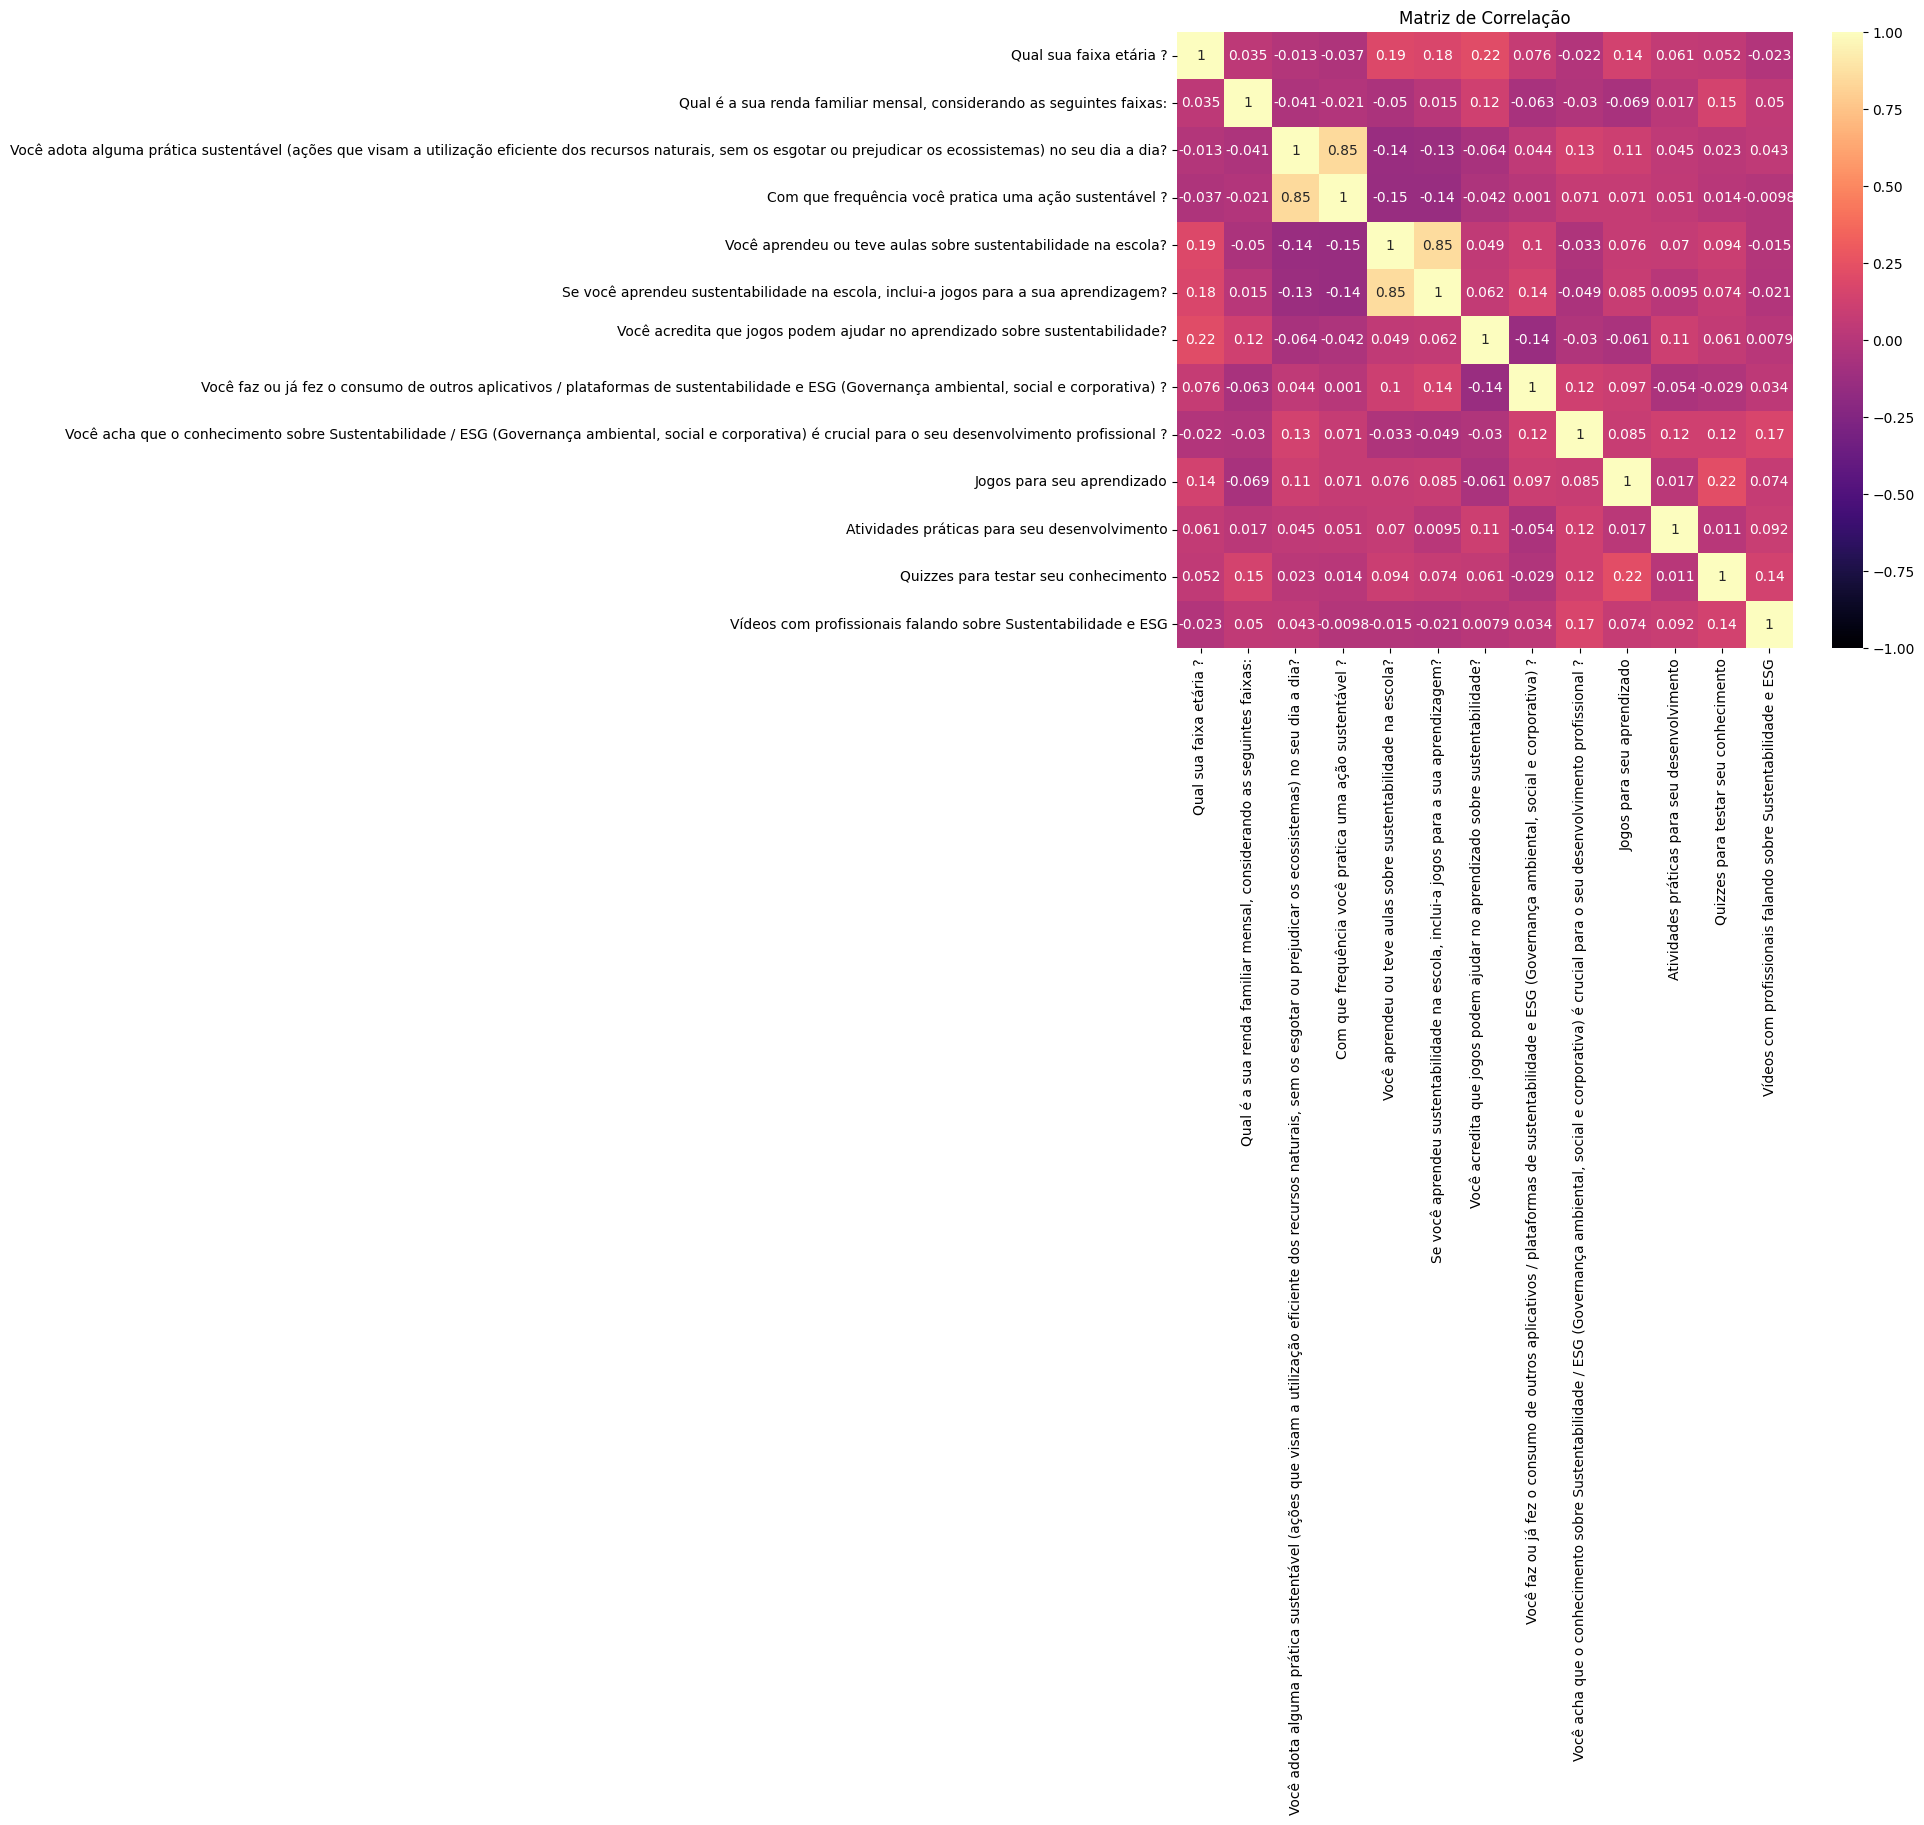

In [214]:
# Calculando a matriz de correlação para os atributos
matriz_correlacao = atributos_pre.corr()

# Definindo o tamanho do gráfico
plt.figure(figsize = (10, 8))

# Criando heatmap
sns.heatmap(matriz_correlacao, annot = True, cmap = 'magma', vmin = -1, vmax = 1, square = True)
plt.title("Matriz de Correlação")
plt.show()


### PCA

#### Explicação do uso do PCA

O PCA é uma técnica estatística de redução de dimensionalidade. Aplicando o PCA nos quatro modelos (Naive Bayes, Gini, Entropia e KNN), tivemos um desempenho ruim, diminuindo as acurácias.
Portanto não iremos usar o PCA, nesses Modelos.

#### Utilizando o PCA em busca de redução de dimensionalidade para aumentar a acurácia.

In [215]:
# pca = PCA(n_components = 0.95) # Preservando 95% da variância
# atributos_pre_pca = pca.fit_transform(atributos_pre)
# print(atributos_pre_pca)

### Separando em Treino e Teste

##### Treino e teste

In [216]:
X_treino, X_teste, y_treino, y_teste = train_test_split(atributos_pre, resposta_pre, test_size = 0.20, random_state = 42)

### Duplicando os Dados

- Para tentar melhorar o desempenho dos nossos modelos, vamos aumentar a nossa base de dados.

- O processo do Smote cria dados a partir dos registros do dataset igualmente. Ao colocar o k_neigbors = 5, ele vai ser basear nos 5 pontos mais próximos para criar um novo dado.

In [217]:
smote = SMOTE(k_neighbors = 5, random_state = 42)
X_treino_smote, y_treino_smote = smote.fit_resample(X_treino, y_treino)

## 🧠 Modelo NaiveBayes 🧠

### Treinando o Modelo

##### Criando o classificador

In [218]:
# Classificador GaussianNB
classificador_bayes = GaussianNB()

# Classificador GaussianNB com SMOTE
classificador_bayes_smote = GaussianNB()

# Treinando o Modelo
classificador_bayes.fit(X_treino, y_treino)

# Treinando o Modelo com o SMOTE
classificador_bayes_smote.fit(X_treino_smote, y_treino_smote)

GaussianNB()

##### Prevendo o Modelo - Com o conjunto de teste

In [219]:
# Prevendo o Modelo
previsoes_bayes = classificador_bayes.predict(X_teste)
#display(previsoes_bayes)

# Prevendo o Modelo com o SMOTE
previsoes_bayes_smote = classificador_bayes_smote.predict(X_teste)

### Mostrando as métricas - Antes do Cross Validation

In [220]:
nome_das_classes_bayes = [str(classe) for classe in label_encoder.classes_]

reporte_de_classificacao_bayes = classification_report(y_teste, previsoes_bayes, target_names = nome_das_classes_bayes)
print("Métricas Bayes: \n", reporte_de_classificacao_bayes)

print("-------------------------------------------------------------")

# Métricas Bayes com SMOTE
reporte_de_classificacao_bayes_smote = classification_report(y_teste, previsoes_bayes_smote, target_names = nome_das_classes_bayes)
print("Métricas Bayes com SMOTE: \n", reporte_de_classificacao_bayes_smote)

Métricas Bayes: 
                      precision    recall  f1-score   support

         Estudantil       0.14      0.09      0.11        11
Não tenho motivação       0.77      0.85      0.81        40

           accuracy                           0.69        51
          macro avg       0.46      0.47      0.46        51
       weighted avg       0.64      0.69      0.66        51

-------------------------------------------------------------
Métricas Bayes com SMOTE: 
                      precision    recall  f1-score   support

         Estudantil       0.39      0.64      0.48        11
Não tenho motivação       0.88      0.72      0.79        40

           accuracy                           0.71        51
          macro avg       0.63      0.68      0.64        51
       weighted avg       0.77      0.71      0.73        51



##### Matriz de Confusão

Matriz de Confusão Bayes: 
[[ 1 10]
 [ 6 34]]


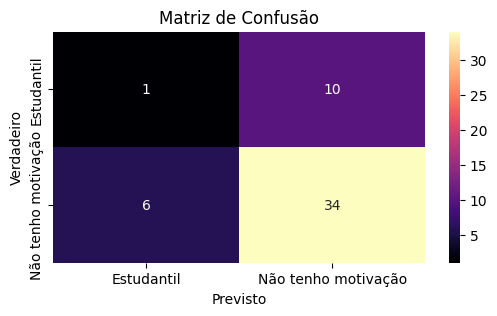

----------------------------------------------------------------
Matriz de Confusão Bayes com SMOTE: 
[[ 7  4]
 [11 29]]


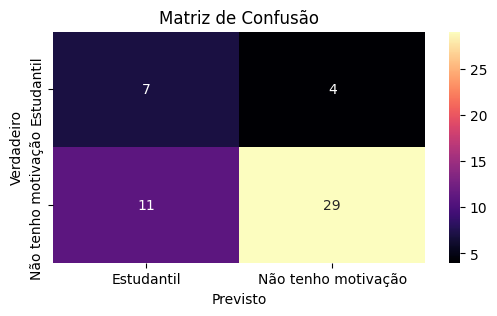

In [221]:
matriz_de_confusao_bayes = confusion_matrix(y_teste, previsoes_bayes)
print(f"Matriz de Confusão Bayes: \n{matriz_de_confusao_bayes}")


# Plotando a Matriz de Confusão
plt.figure(figsize = (6,3))
sns.heatmap(matriz_de_confusao_bayes, annot = True, fmt = 'd', cmap = 'magma', xticklabels = nome_das_classes_bayes, yticklabels = nome_das_classes_bayes)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()


print("----------------------------------------------------------------")

matriz_de_confusao_bayes_smote = confusion_matrix(y_teste, previsoes_bayes_smote)
print(f"Matriz de Confusão Bayes com SMOTE: \n{matriz_de_confusao_bayes_smote}")


# Plotando a Matriz de Confusão
plt.figure(figsize = (6,3))
sns.heatmap(matriz_de_confusao_bayes_smote, annot = True, fmt = 'd', cmap = 'magma', xticklabels = nome_das_classes_bayes, yticklabels = nome_das_classes_bayes)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()

### Cross Validation

- #### Vamos dividir em 5 partes

In [222]:
# Criando classificador Cross Validation
classificador_bayes_cross_validation = GaussianNB()
# Parâmetros para o Cross Validation
parametros = {}

# Usando o GridSearchCV
bayes_cross_validation_grid = GridSearchCV(estimator = classificador_bayes_cross_validation, param_grid = parametros, scoring = "f1", cv = KFold(n_splits = 5, random_state = 42, shuffle = True))

# Treinando o Modelo
bayes_cross_validation_grid.fit(X_treino_smote, y_treino_smote)

# Testando o Modelo
previsoes_bayes_cross_validation_grid = bayes_cross_validation_grid.predict(X_teste)

print("-"*100)

# Mostrando as melhor acurácia

bayes_resultados = bayes_cross_validation_grid.cv_results_
bayes_acuracias_cross_validation = bayes_resultados['mean_test_score']

bayes_melhor_acuracias = sorted(bayes_acuracias_cross_validation, reverse = True)[:5]
print("Melhores acurácias: ", bayes_melhor_acuracias)

bayes_acuracias_media = np.mean(bayes_melhor_acuracias)
print("Média das acurácias: ", bayes_acuracias_media)

print("-"*100)




----------------------------------------------------------------------------------------------------
Melhores acurácias:  [0.657440804422644]
Média das acurácias:  0.657440804422644
----------------------------------------------------------------------------------------------------


#### Métricas com o Cross Validation

In [223]:
reporte_de_classificacao_bayes_cross_validation = classification_report(y_teste, previsoes_bayes_cross_validation_grid, target_names = nome_das_classes_bayes)
print("Métricas Bayes: \n", reporte_de_classificacao_bayes_cross_validation)

Métricas Bayes: 
                      precision    recall  f1-score   support

         Estudantil       0.39      0.64      0.48        11
Não tenho motivação       0.88      0.72      0.79        40

           accuracy                           0.71        51
          macro avg       0.63      0.68      0.64        51
       weighted avg       0.77      0.71      0.73        51



#### Matriz de Confusão

Matriz de Confusão KNN:  
 [[ 7  4]
 [11 29]]


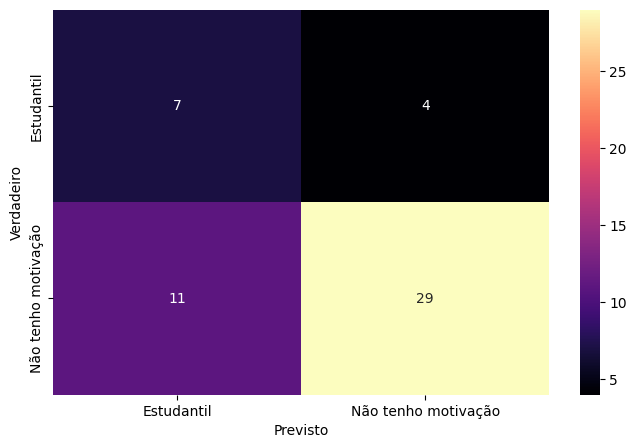

-------------------------------------------------------------------------------------------------------


In [224]:
# MATRIZ DE CONFUSÃO KNN
matriz_de_confusao_bayes_cross_validation = confusion_matrix(y_teste, previsoes_bayes_cross_validation_grid)
print("Matriz de Confusão KNN: ", "\n", matriz_de_confusao_bayes_cross_validation)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_bayes_cross_validation, annot=True, fmt='d', cmap='magma', xticklabels = nome_das_classes_bayes, yticklabels = nome_das_classes_bayes)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

print("-"*103)

## Realizando a Serialização

A serialização é a prática de converter um objeto ou estrutura de dados em um formato que possa ser armazenado ou transmitido e posteriormente reconstruído.

Vamos realizar a serialização para salvar o modelo dentro de um arquivo .pkl para depois alicarmos o Modelo dentro do nosso aplicativo.

<hr>

Fazendo a criação da pipeline, para sempre rodar o pré-processados para normalizar os dados, smote para realizar o balancemaneto de classes e o model escolhendo o melhor modelo que conseguimos que foi o GaussianNB

##### Criando e treinando a pipeline

In [225]:
pipeline_bayes = Pipeline(steps=[
    ('smote', smote),
    ('model', bayes_cross_validation_grid)
])

pipeline = pipeline_bayes

pipeline.fit(X_treino, y_treino)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('model',
                 GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                              estimator=GaussianNB(), param_grid={},
                              scoring='f1'))])

##### Serializando o modelo e o preprocessador

In [226]:
# Serializando o preprocessador
with open('preprocessador.pkl', 'wb') as file:
    pkl.dump(preprocessador, file)

# Serializando o modelo
with open('model.pkl', 'wb') as file:
    pkl.dump(pipeline, file)

#### Testando a IA

##### Desserialização o modelo e o preprocessador

In [227]:
with open('preprocessador.pkl', 'rb') as file:
    preprocessador_desserializado = pkl.load(file)

# Carregar o modelo serializado
with open('model.pkl', 'rb') as file:
    model_desserializado = pkl.load(file)

In [228]:

# Colunas esperadas pelo modelo
colunas_esperadas = model_desserializado.feature_names_in_
print(colunas_esperadas)

# Criar o DataFrame com os dados de entrada
faixa = 'Acima de 60 anos'
classe = 'Classe E: Até R$ 1.320,00.'
adota = 'Não'
frequencia = ''
aprendeu = 'Não'
inclui = 'Não'
jogos = 'Não'
consumo = 'Não'
conhecimento = 'Não'
func1 = False
func2 = False
func3 = False
func4 = False

df_resposta = pd.DataFrame({
    'Qual sua faixa etária ?':[faixa],
    'Qual é a sua renda familiar mensal, considerando as seguintes faixas:': [classe],
    'Você adota alguma\xa0prática sustentável\xa0(ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas)\xa0no seu dia a dia?': [adota],
    'Com que frequência você pratica uma ação sustentável ?': [frequencia],
    'Você aprendeu ou teve aulas sobre\xa0sustentabilidade\xa0na escola?': [aprendeu],
    'Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?': [inclui],
    'Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n': [jogos],
    'Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?': [consumo],
    'Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?': [conhecimento],
    'Jogos para seu aprendizado': [func1],
    'Atividades práticas para seu desenvolvimento': [func2],
    'Quizzes para testar seu conhecimento': [func3],
    'Vídeos com profissionais falando sobre Sustentabilidade e ESG': [func4],
})

display(df_resposta)

# Reindexar para garantir que tenha as mesmas colunas e na mesma ordem que o modelo espera
# df_resposta = df_resposta.reindex(columns=colunas_esperadas, fill_value=0)

novo = preprocessador_desserializado.transform(df_resposta)
display(novo)


# Fazer a previsão
previsao = model_desserializado.predict(novo)[0]
print("Previsão:", previsao)

print("-------------------------------------------------------------------")

if previsao == 0:
    previsao_texto = 'Estudantil'
    print(f"A IA preveu que sua motivação seria: {previsao_texto}")
else:
    previsao_texto = 'Não tenho motivação'
    print(f"A IA preveu que sua motivação seria: {previsao_texto}")

print("-------------------------------------------------------------------")


['Qual sua faixa etária ?'
 'Qual é a sua renda familiar mensal, considerando as seguintes faixas:'
 'Você adota alguma\xa0prática sustentável\xa0(ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas)\xa0no seu dia a dia?'
 'Com que frequência você pratica uma ação sustentável ?'
 'Você aprendeu ou teve aulas sobre\xa0sustentabilidade\xa0na escola?'
 'Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?'
 'Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n'
 'Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?'
 'Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?'
 'Jogos para seu aprendizado'
 'Atividades práticas para seu desenvolvimento'
 'Quizzes para testar seu conhecimento'
 'Vídeos

,Qual sua faixa etária ?,"Qual é a sua renda familiar mensal, considerando as seguintes faixas:","Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?",Com que frequência você pratica uma ação sustentável ?,Você aprendeu ou teve aulas sobre sustentabilidade na escola?,"Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?",Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n,"Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?","Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?",Jogos para seu aprendizado,Atividades práticas para seu desenvolvimento,Quizzes para testar seu conhecimento,Vídeos com profissionais falando sobre Sustentabilidade e ESG
0,Acima de 60 anos,"Classe E: Até R$ 1.320,00.",Não,,Não,Não,Não,Não,Não,False,False,False,False


array([[ 0.,  4.,  0., -1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Previsão: 1
-------------------------------------------------------------------
A IA preveu que sua motivação seria: Não tenho motivação
-------------------------------------------------------------------


C:\Users\murilomoreira-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
